In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sp500 = yf.download('^GSPC', start='2018-01-01', end='2022-12-31', progress=False)

YF.download() has changed argument auto_adjust default to True


In [3]:
prices = sp500['Close']

In [4]:
scaled_prices = []

for i in range(len(prices)):
    x = prices.squeeze().iloc[i]
    y = (x - prices.squeeze().min()) / (prices.squeeze().max() - prices.squeeze().min())
    scaled_prices.append(y)

In [5]:
log_returns = []

for i in range(1,len(prices)):
    x = np.log(prices.squeeze().iloc[i]) - np.log(prices.squeeze().iloc[i-1])
    log_returns.append(x)

log_returns.insert(0,0)

In [6]:
X = pd.DataFrame({
    'Close Prices': prices.squeeze(),
    # 'Log Returns': log_returns,
    # 'Scaled Prices': scaled_prices
})

X['PCT'] = X['Close Prices'].pct_change() * 100
X['PCT-1'] = X['PCT'].shift(1)
X['PCT-2'] = X['PCT'].shift(2)
X['PCT-3'] = X['PCT'].shift(3)
X['PCT-4'] = X['PCT'].shift(4)
X['PCT-5'] = X['PCT'].shift(5)
X['PCT-6'] = X['PCT'].shift(6)
X['PCT-7'] = X['PCT'].shift(7)

X = X.dropna()
X

,Close Prices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7
Date,,,,,,,,,
2018-01-12,2786.239990,0.674960,0.703365,-0.111223,0.130293,0.166234,0.703377,0.402864,0.639882
2018-01-16,2776.419922,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.166234,0.703377,0.402864
2018-01-17,2802.560059,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.166234,0.703377
2018-01-18,2798.030029,-0.161639,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.166234
2018-01-19,2810.300049,0.438524,-0.161639,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.130293
...,...,...,...,...,...,...,...,...,...
2022-12-23,3844.820068,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,-0.605272
2022-12-27,3829.250000,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168
2022-12-28,3783.219971,-1.202064,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775


In [7]:
Data = pd.DataFrame()

Data['PCT today'] = X['PCT']
Data['PCT today-1'] = X['PCT-1']
Data['PCT today-2'] = X['PCT-2']
Data['PCT today-3'] = X['PCT-3']
Data['PCT today-4'] = X['PCT-4']
Data['PCT today-5'] = X['PCT-5']
Data['PCT today-6'] = X['PCT-6']
Data['PCT today-7'] = X['PCT-7']

Data = Data.dropna()
Data

,PCT today,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7
Date,,,,,,,,
2018-01-12,0.674960,0.703365,-0.111223,0.130293,0.166234,0.703377,0.402864,0.639882
2018-01-16,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.166234,0.703377,0.402864
2018-01-17,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.166234,0.703377
2018-01-18,-0.161639,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.166234
2018-01-19,0.438524,-0.161639,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.130293
...,...,...,...,...,...,...,...,...
2022-12-23,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,-0.605272
2022-12-27,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168
2022-12-28,-1.202064,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775


In [8]:
InputData = Data.drop('PCT today',axis='columns')
InputData

,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7
Date,,,,,,,
2018-01-12,0.703365,-0.111223,0.130293,0.166234,0.703377,0.402864,0.639882
2018-01-16,0.674960,0.703365,-0.111223,0.130293,0.166234,0.703377,0.402864
2018-01-17,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.166234,0.703377
2018-01-18,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.130293,0.166234
2018-01-19,-0.161639,0.941505,-0.352449,0.674960,0.703365,-0.111223,0.130293
...,...,...,...,...,...,...,...
2022-12-23,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168,-0.605272
2022-12-27,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775,-2.492168
2022-12-28,-0.404962,0.586810,-1.445170,1.486799,0.103734,-0.900752,-1.113775


In [9]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - x ** 2

In [22]:
# Single layer perceptron

np.random.seed(42)

ninputs = 7
noutput = 1

weights = np.random.uniform(-1, 1, (ninputs, noutput))
bias = np.random.uniform(-1, 1, (noutput, noutput))

# learning_rate = 0.0002
learning_rate = 0.005
epochs = 101

k = 0.005
T = 253

arr = np.arange(1,101)
SRarr = []

for epoch in range(1,epochs):
    
    allocations = np.zeros(len(InputData))
    net_input = np.zeros(len(InputData))
        
    for i in range(1,len(InputData) + 1):
        current_input = InputData.iloc[i-1]
        
        # Forward pass
        output_input = np.dot(current_input, weights) + bias
        output = tanh(output_input)
        net_input[i-1] = output_input.item()
        allocations[i-1] = output.item()

    # Calculation for Asset Returns and Mu
    asset_returns = allocations * Data['PCT today'].values
    average_daily_return = np.mean(asset_returns)
    average_daily_excess_return = average_daily_return - k
    
    # Calculation of Standard deviation
    squared_deviations = np.square(asset_returns - average_daily_excess_return)
    sigma = np.sqrt(np.mean(squared_deviations))
    
    # Annulaized Sharpe Ratio
    annualized_SR = np.sqrt(T) * (average_daily_excess_return / sigma)
    SRarr.append(annualized_SR)

    # Select random pattern
    num = np.random.randint(0, len(InputData))
    
    # Update weights per pattern    
    # Backpropagation
    a = np.sqrt(T) / sigma
    b = average_daily_excess_return / sigma
    c = (asset_returns[num] - (average_daily_excess_return + k)) / sigma
            
    Ct = a * (1 - (b * c))
                
    beta_output = Ct * Data['PCT today'].iloc[num] * tanh_derivative(allocations[num]) * net_input[num]
            
    weights += learning_rate * beta_output
    bias += learning_rate * beta_output

    if epoch % 50 == 0:
        print(f"Epoch {epoch}")
        print(f"Gradient: {beta_output}, Weight Update: {learning_rate * beta_output}, Ct: {Ct}")
        print(f"Weights: {weights}, Bias: {bias}")
        print(f"Allocations: {allocations}, Net_Input: {net_input}")
        print(f"Asset Returns: {asset_returns}, Average Daily Excess Return: {average_daily_excess_return}")
        print(f"Sigma: {sigma}, Annualized SR: {annualized_SR}")

Epoch 50
Gradient: -2.9722837346737654, Weight Update: -0.014861418673368827, Ct: 13.597767091103394
Weights: [[-0.30415832]
 [ 0.84819006]
 [ 0.41074933]
 [ 0.14407841]
 [-0.74120127]
 [-0.74124952]
 [-0.93707133]], Bias: [[0.67911374]]
Allocations: [-0.72459521  0.07578477  0.66184856 ...  0.98775672  0.3693691
 -0.78323321], Net_Input: [-0.91725282  0.07593036  0.796096   ...  2.54489234  0.38769232
 -1.05368067]
Asset Returns: [-0.489073   -0.02671025  0.62313383 ... -1.18734663  0.64496763
  0.19899939], Average Daily Excess Return: -0.01042756684041327
Sigma: 1.1416059320395249, Annualized SR: -0.1452870902982782
Epoch 100
Gradient: 0.0543295749627514, Weight Update: 0.000271647874813757, Ct: 13.937990685437473
Weights: [[-0.28464122]
 [ 0.86770715]
 [ 0.43026642]
 [ 0.16359551]
 [-0.72168418]
 [-0.72173242]
 [-0.91755424]], Bias: [[0.69863083]]
Allocations: [-0.71693892  0.09176033  0.66896836 ...  0.98768317  0.36642906
 -0.78004165], Net_Input: [-0.90131779  0.09201918  0.8088

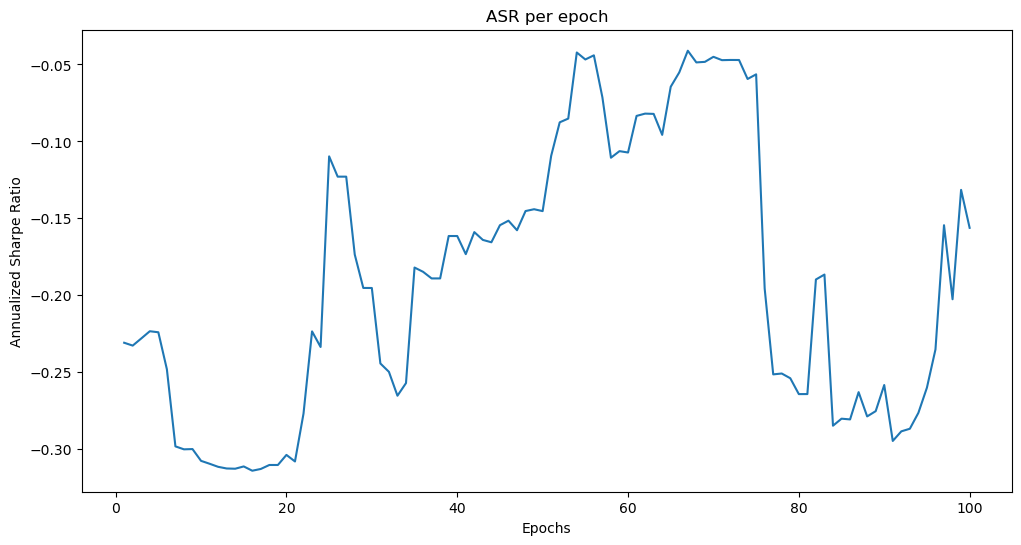

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(arr, SRarr)
plt.xlabel("Epochs")
plt.ylabel("Annualized Sharpe Ratio")
plt.title("ASR per epoch")
plt.show()

In [11]:
test = yf.download('^GSPC', start='2023-01-01', end='2024-12-31', progress=False)
test_prices = test['Close']

In [12]:
test_scaled_prices = []

for i in range(len(test_prices)):
    x = test_prices.squeeze().iloc[i]
    y = (x - test_prices.squeeze().min()) / (test_prices.squeeze().max() - test_prices.squeeze().min())
    test_scaled_prices.append(y)

In [13]:
test_log_returns = []

for i in range(1,len(test_prices)):
    x = np.log(test_prices.squeeze().iloc[i]) - np.log(test_prices.squeeze().iloc[i-1])
    test_log_returns.append(x)

test_log_returns.insert(0,0)

In [14]:
test_X = pd.DataFrame({
    'Close Prices': test_prices.squeeze(),
    # 'Log Returns': test_log_returns,
    # 'Scaled Prices': test_scaled_prices
})

test_X['PCT'] = test_X['Close Prices'].pct_change() * 100
test_X['PCT-1'] = test_X['PCT'].shift(1)
test_X['PCT-2'] = test_X['PCT'].shift(2)
test_X['PCT-3'] = test_X['PCT'].shift(3)
test_X['PCT-4'] = test_X['PCT'].shift(4)
test_X['PCT-5'] = test_X['PCT'].shift(5)
test_X['PCT-6'] = test_X['PCT'].shift(6)
test_X['PCT-7'] = test_X['PCT'].shift(7)

test_X = test_X.dropna()
test_X

,Close Prices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7
Date,,,,,,,,,
2023-01-13,3999.090088,0.399686,0.341591,1.284942,0.697823,-0.076763,2.284078,-1.164553,0.753897
2023-01-17,3990.969971,-0.203049,0.399686,0.341591,1.284942,0.697823,-0.076763,2.284078,-1.164553
2023-01-18,3928.860107,-1.556260,-0.203049,0.399686,0.341591,1.284942,0.697823,-0.076763,2.284078
2023-01-19,3898.850098,-0.763835,-1.556260,-0.203049,0.399686,0.341591,1.284942,0.697823,-0.076763
2023-01-20,3972.610107,1.891840,-0.763835,-1.556260,-0.203049,0.399686,0.341591,1.284942,0.697823
...,...,...,...,...,...,...,...,...,...
2024-12-23,5974.069824,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,-0.002647,-0.541402
2024-12-24,6040.040039,1.104276,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,-0.002647
2024-12-26,6037.589844,-0.040566,1.104276,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935


In [15]:
test_Data = pd.DataFrame()

test_Data['Close Prices'] = test_X['Close Prices']
test_Data['PCT today'] = test_X['PCT']
test_Data['PCT today-1'] = test_X['PCT-1']
test_Data['PCT today-2'] = test_X['PCT-2']
test_Data['PCT today-3'] = test_X['PCT-3']
test_Data['PCT today-4'] = test_X['PCT-4']
test_Data['PCT today-5'] = test_X['PCT-5']
test_Data['PCT today-6'] = test_X['PCT-6']
test_Data['PCT today-7'] = test_X['PCT-7']

test_Data = test_Data.dropna()

test_Data

,Close Prices,PCT today,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7
Date,,,,,,,,,
2023-01-13,3999.090088,0.399686,0.341591,1.284942,0.697823,-0.076763,2.284078,-1.164553,0.753897
2023-01-17,3990.969971,-0.203049,0.399686,0.341591,1.284942,0.697823,-0.076763,2.284078,-1.164553
2023-01-18,3928.860107,-1.556260,-0.203049,0.399686,0.341591,1.284942,0.697823,-0.076763,2.284078
2023-01-19,3898.850098,-0.763835,-1.556260,-0.203049,0.399686,0.341591,1.284942,0.697823,-0.076763
2023-01-20,3972.610107,1.891840,-0.763835,-1.556260,-0.203049,0.399686,0.341591,1.284942,0.697823
...,...,...,...,...,...,...,...,...,...
2024-12-23,5974.069824,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,-0.002647,-0.541402
2024-12-24,6040.040039,1.104276,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935,-0.002647
2024-12-26,6037.589844,-0.040566,1.104276,0.728727,1.086912,-0.086511,-2.949285,-0.386399,0.379935


In [16]:
input_test_data = test_Data.drop(columns=['Close Prices', 'PCT today'])

Final Portfolio Value: 696160.0834960938
Shares Held: 117
Cash: 5048.1103515625


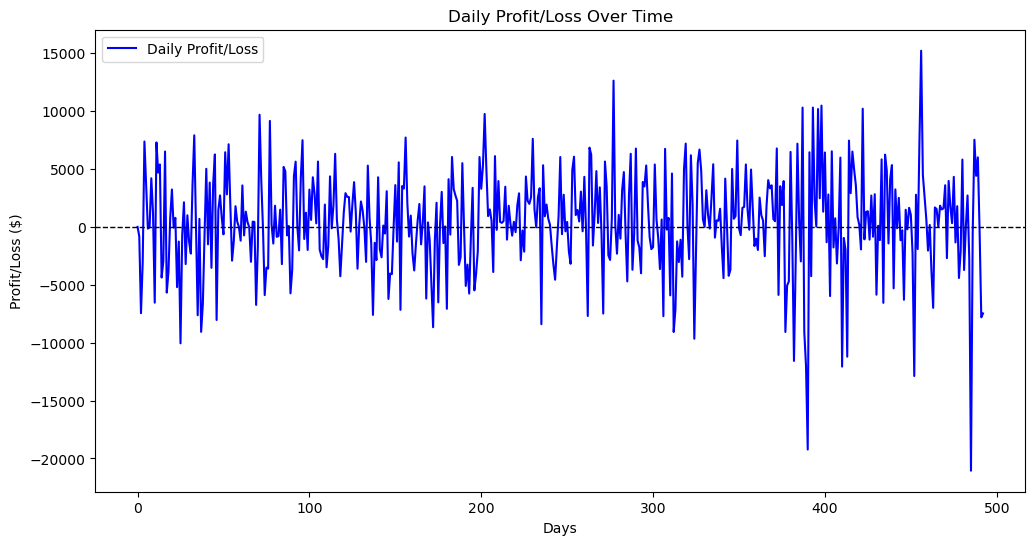

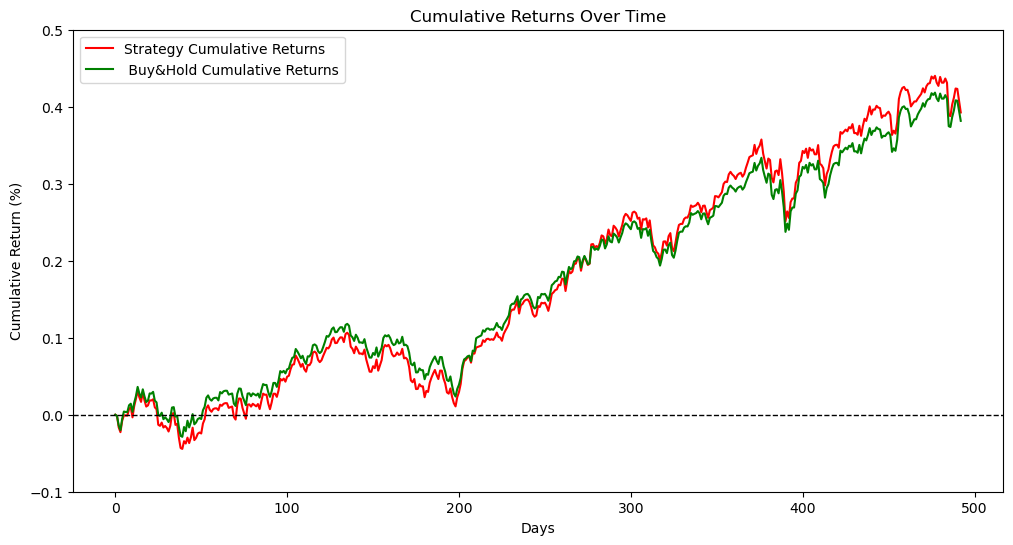

In [17]:
# Initialize tracking variables
portfolio_values = []
profits = []
cumulative_returns = []
allocations = []

# Initialize portfolio
initial_shares = 100
initial_cash = 100000  # Start with no cash
portfolio_value = initial_shares * test_Data['Close Prices'].iloc[0] + initial_cash  # Initial portfolio value
trading_capital = 0.2 * portfolio_value  # 20% of portfolio value for trading
shares_held = initial_shares
cash = initial_cash

cumulative_returns.append(0)
portfolio_values.append(portfolio_value)
profits.append(0)

buy_and_hold_value = initial_shares * test_Data['Close Prices'].iloc[0] + initial_cash
buy_and_hold_cumulative_returns = []
buy_and_hold_cumulative_returns.append(0)

# Trading simulation
for i in range(1,len(input_test_data)):
    current_price = test_Data['Close Prices'].iloc[i]
    current_input = input_test_data.iloc[i]  # Features for the current day
    
    # Forward pass to get allocation
    output_input = np.dot(current_input, weights) + bias
    allocation = np.tanh(output_input).item()  # Model's allocation for the day
    allocations.append(allocation)

    # Recalculate trading capital dynamically
    # trading_capital = 0.2 * portfolio_value

    # Trading logic with risk management
    if allocation > 0:  # Buy signal
        # Calculate the number of shares to buy, ensuring cash does not go negative
        max_shares_to_buy = int(cash / current_price) if cash > 0 else 0
        shares_to_buy = min(int((trading_capital * allocation) / current_price), max_shares_to_buy)
        cost = shares_to_buy * current_price
        
        # Update portfolio
        shares_held += shares_to_buy
        cash -= cost
    elif allocation < 0:  # Sell signal
        # Calculate the number of shares to sell
        shares_to_sell = int((trading_capital * abs(allocation)) / current_price)
        shares_to_sell = min(shares_to_sell, shares_held)  # Cannot sell more than held
        revenue = shares_to_sell * current_price
        
        # Update portfolio
        shares_held -= shares_to_sell
        cash += revenue

    # Update portfolio value
    new_portfolio_value = shares_held * current_price + cash
    daily_profit = new_portfolio_value - portfolio_values[i-1]  # Profit on this day
    portfolio_values.append(new_portfolio_value)
    profits.append(daily_profit)

    # Calculate cumulative return
    cumulative_returns.append((new_portfolio_value / portfolio_values[0]) - 1)
    buy_and_hold_cumulative_returns.append(((initial_shares * current_price + initial_cash) / buy_and_hold_value) - 1)
    
    # Update portfolio value
    portfolio_value = new_portfolio_value

# Final portfolio value
print(f"Final Portfolio Value: {portfolio_value}")
print(f"Shares Held: {shares_held}")
print(f"Cash: {cash}")

# Plot daily profits
plt.figure(figsize=(12, 6))
plt.plot(profits, label="Daily Profit/Loss", color="blue")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero-profit line
plt.xlabel("Days")
plt.ylabel("Profit/Loss ($)")
plt.title("Daily Profit/Loss Over Time")
plt.legend()
plt.show()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label="Strategy Cumulative Returns", color="red")
plt.plot(buy_and_hold_cumulative_returns, label=" Buy&Hold Cumulative Returns", color="green")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero return line
plt.ylim(-0.1,0.5)
plt.xlabel("Days")
plt.ylabel("Cumulative Return (%)")
plt.title("Cumulative Returns Over Time")
plt.legend()
plt.show()

# Plot buy and hold
# plt.figure(figsize=(12, 6))
# plt.plot(buy_and_hold_cumulative_returns, label="Cumulative Returns", color="green")
# plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero return line
# plt.ylim(-0.1,0.5)
# plt.xlabel("Days")
# plt.ylabel("Cumulative Return (%)")
# plt.title("Buy and Hold Cumulative Returns Over Time")
# plt.legend()
# plt.show()

In [18]:
# Calculation for Asset Returns and Mu
asset_returns = allocations * test_Data['PCT today'][1:].values
average_daily_return = np.mean(asset_returns)
average_daily_excess_return = average_daily_return - k
    
# Calculation of Standard deviation
squared_deviations = np.square(asset_returns - average_daily_excess_return)
sigma = np.sqrt(np.mean(squared_deviations))
    
# Annulaized Sharpe Ratio
annualized_SR = np.sqrt(T) * (average_daily_excess_return / sigma)
print(f"Annualized Sharpe Ratio: {annualized_SR}")

Annualized Sharpe Ratio: -0.27106257922182453


In [19]:
# Calculate daily returns
daily_returns = np.diff(portfolio_values) / portfolio_values[:-1]

# Calculate average daily return
average_daily_return = np.mean(daily_returns)

# Calculate standard deviation of daily returns
std_dev_daily_returns = np.std(daily_returns)

# Annualize the average daily return and standard deviation
annualized_return = average_daily_return * 253
annualized_std_dev = std_dev_daily_returns * np.sqrt(253)

# Risk-free rate
risk_free_rate = 0.0002

# Calculate Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std_dev

print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 1.509246397697458


In [20]:
# print(f"Allocations for each day: {allocations}")

In [21]:
sum(profits)

196251.07470703125

In [22]:
sum(allocations)

148.80397063756075

In [23]:
min(allocations)

-0.9995214151870174

In [24]:
max(allocations)

0.9999985676224447

In [25]:
allocations

[0.8286760620892922,
 -0.7119297822438202,
 -0.10345226686439273,
 -0.9771465576357024,
 -0.9931824971533458,
 0.7781281200126126,
 0.9977977400200269,
 0.9976508747032057,
 0.8455503378498279,
 0.19266204623183422,
 -0.5725093414820245,
 -0.8976987195010971,
 0.5043716774319069,
 0.6727064154502479,
 0.9931724656474821,
 0.4663864578030304,
 -0.7236413752375169,
 -0.8724967391232834,
 -0.6594037824291719,
 -0.4953917858159025,
 0.4355297800901603,
 0.9714980410277123,
 0.8944764094078208,
 0.9948238867151923,
 -0.44326480669769075,
 -0.5091472549296123,
 -0.98942174963947,
 0.24974215880299583,
 0.9564981226832968,
 0.9911815649819307,
 0.9847312961259607,
 0.965758448236805,
 0.4878191553337325,
 0.649110715125972,
 0.9975793465791619,
 0.9816091109457054,
 -0.25672803548255024,
 -0.5294811251424412,
 -0.9897320924234515,
 -0.9450392592586603,
 0.043499353739509694,
 0.9997831337348434,
 0.9875900320271271,
 0.9999525737749055,
 0.4153755484642984,
 0.4817691004595969,
 0.31628472261

In [26]:
buy_and_hold_cumulative_returns

[0,
 -0.001624319035011923,
 -0.014048552683391113,
 -0.02005164709417573,
 -0.005296960047368016,
 0.004144748411978982,
 0.003572622810801507,
 0.0034266001434928306,
 0.012270201711024331,
 0.014296595869765838,
 0.003736666335714567,
 0.01550482355846694,
 0.024028347346218615,
 0.03614051248486483,
 0.02748297993487392,
 0.022402074830707663,
 0.0329879856553974,
 0.02375827866721636,
 0.01648498239889662,
 0.018277300756831982,
 0.027645021142275183,
 0.027412947658980613,
 0.029707408179213024,
 0.018267289169274115,
 0.016002912248728185,
 -0.00035006370544088394,
 -0.0016083004949191126,
 0.0026464777061723233,
 -0.005811067277721849,
 -0.0033706329271933066,
 -0.005789090622106863,
 -0.009541775497914129,
 -0.0035486438376749474,
 0.009311655495118698,
 0.009867762556203363,
 -0.002544457187106275,
 -0.0014162733618564571,
 -0.016156944186083044,
 -0.02750500542750134,
 -0.028671233285471387,
 -0.015962914735508704,
 -0.02143593221285922,
 -0.007763424525547236,
 -0.016493040